<a href="https://colab.research.google.com/github/wonyoung-ji/study/blob/master/kaggle/2020_Kaggle_ML_%26_DS_Survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.모듈설치

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec 

from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable

import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['figure.dpi'] = 200 #high resolution

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 1.파일탐색

In [3]:
data = pd.read_csv('/content/gdrive/MyDrive/kaggle/kaggle_survey_2020_responses.csv')
data.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,...,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming language would you recommend ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool.

- 설문지 내용
- 1열은 설문지 질문
- 각 컬럼은 설문지 항목

In [4]:
data.columns

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3',
       ...
       'Q35_B_Part_2', 'Q35_B_Part_3', 'Q35_B_Part_4', 'Q35_B_Part_5',
       'Q35_B_Part_6', 'Q35_B_Part_7', 'Q35_B_Part_8', 'Q35_B_Part_9',
       'Q35_B_Part_10', 'Q35_B_OTHER'],
      dtype='object', length=355)

In [5]:
data.shape

(20037, 355)

In [6]:
data.describe()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,...,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
count,20037,20037,20037,20037,19570,19278,19121,15531,4278,7536,3316,3828,3368,2996,263,199,1777,2218,207,1946,17822,11212,3827,2446,5874,5100,3291,3133,2453,1503,1605,387,1163,5993,6330,858,181,2073,106,847,...,557,578,182,182,344,204,1007,2116,181,2429,2541,3275,1511,2398,3162,2109,189,2480,860,802,834,447,2385,2753,1349,316,708,805,194,936,1178,495,431,3200,558,481,847,520,3083,252
unique,5168,12,6,56,8,14,8,2,2,2,2,2,2,2,2,2,2,2,2,2,14,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,565,25-29,Man,India,Master’s degree,Student,3-5 years,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,None,Other,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",RStudio,Visual Studio,Visual Studio Code (VSCode),PyCharm,Spyder,Notepad++,Sublime Text,Vim / Emacs,MATLAB,None,Other,Kaggle Notebooks,Colab Notebooks,Azure Notebooks,Paperspace / Gradient,Binder / JupyterHub,Code Ocean,IBM Watson Studio,...,Einstein Analytics,Qlik,Domo,TIBCO Spotfire,Alteryx,Sisense,SAP Analytics Cloud,None,Other,"Automated data augmentation (e.g. imgaug, albu...",Automated feature engineering/selection (e.g. ...,"Automated model selection (e.g. auto-sklearn, ...",Automated model architecture searches (e.g. da...,Automated hyperparameter tuning (e.g. hyperopt...,Automation of full ML pipelines (e.g. Google C...,None,Other,Google Cloud AutoML,H20 Driverless AI,Databricks AutoML,DataRobot AutoML,Tpot,Auto-Keras,Auto-Sklearn,Auto_ml,Xcessiv,MLbox,None,Other,Neptune.ai,Weights & Biases,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,Trains,Domino Model Monitor,None,Other
freq,34,4011,15789,5851,7859,5171,4546,15530,4277,7535,3315,3827,3367,2995,262,198,1776,2217,206,1945,14241,11211,3826,2445,5873,5099,3290,3132,2452,1502,1604,386,1162,5992,6329,857,180,2072,105,846,...,556,577,181,181,343,203,1006,2115,180,2428,2540,3274,1510,2397,3161,2108,188,2479,859,801,833,446,2384,2752,1348,315,707,804,193,935,1177,494,430,3199,557,480,846,519,3082,251


In [7]:
data.isnull().sum()

Time from Start to Finish (seconds)        0
Q1                                         0
Q2                                         0
Q3                                         0
Q4                                       467
                                       ...  
Q35_B_Part_7                           19556
Q35_B_Part_8                           19190
Q35_B_Part_9                           19517
Q35_B_Part_10                          16954
Q35_B_OTHER                            19785
Length: 355, dtype: int64

# 2.시각화

## Q1 & Q2. Age/Gender Distribution
- Q1 = 응답자들의 나이
- Q2 = 응답자들의 성별

In [8]:
questions = data.iloc[0,].T
data = data.iloc[1:,]

- Q1 분석

In [9]:
pd.unique(data['Q1'])

array(['35-39', '30-34', '22-24', '25-29', '18-21', '55-59', '50-54',
       '40-44', '60-69', '45-49', '70+'], dtype=object)

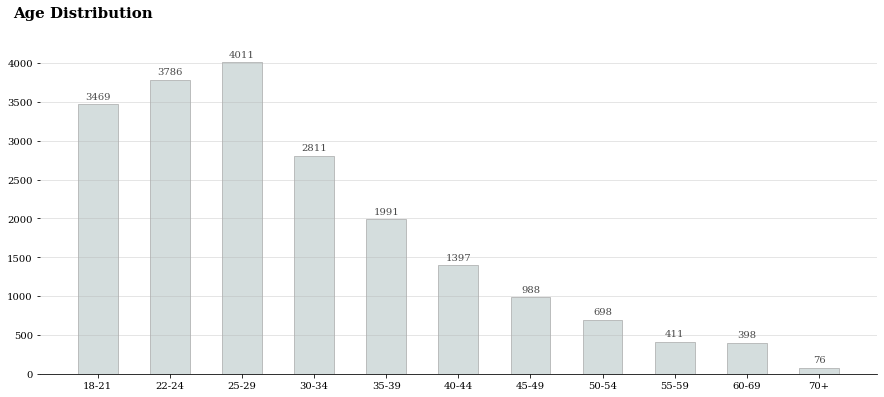

In [10]:
fig, ax = plt.subplots(1,1, figsize=(15,6))
data_q1 = data['Q1'].value_counts().sort_index()
ax.bar(data_q1.index, data_q1, width=0.55, edgecolor='darkgrey', color='#d4dddd', linewidth=0.7)

# annotation 설정
for i in data_q1.index:
  ax.annotate(f'{data_q1[i]}', xy=(i,data_q1[i] + 100), va='center', ha='center', fontweight='light', fontfamily='serif', color='#4a4a4a')

# 그래프 선 삭제
for s in ['top', 'left', 'right']:
  ax.spines[s].set_visible(False)

ax.set_ylim(0,4200)
ax.set_xticklabels(data_q1.index, fontfamily='serif')
ax.set_yticklabels(np.arange(0,4001,500), fontfamily='serif')
fig.text(0.1, 0.95, 'Age Distribution', fontsize=15, fontweight='bold', fontfamily='serif')
ax.grid(axis='y', linestyle='-', alpha=0.4)
plt.show()

- 30살 이하 값들이 절반 이상 차지

- Q2 분석

In [11]:
pd.unique(data['Q2'])

array(['Man', 'Woman', 'Prefer to self-describe', 'Prefer not to say',
       'Nonbinary'], dtype=object)

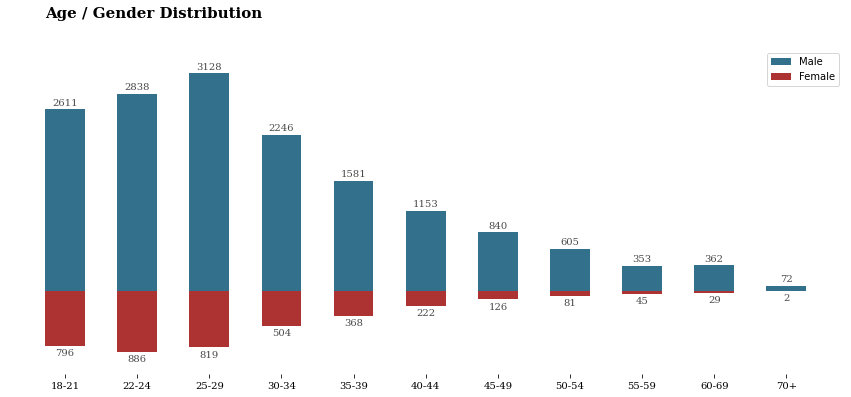

In [12]:
# Man, Woman을 제외한 값들은 ETC로 변환
data['Q2'] = data['Q2'].apply(lambda x : 'ETC' if x not in ('Man','Woman') else x)       

# 시각화
data_q1q2 = data[data['Q2'] != 'ETC'].groupby('Q2')['Q1'].value_counts().unstack().sort_index()
man = data_q1q2.loc['Man']
woman = -data_q1q2.loc['Woman']

fig,ax = plt.subplots(1,1, figsize=(15,6))
ax.bar(man.index, man, width=0.55, color='#004c70', alpha=0.8, label='Male')
ax.bar(woman.index, woman, width=0.55, color='#990000', alpha=0.8, label='Female')
ax.set_ylim(-1200, 3500)

for i in man.index:
  ax.annotate(f'{man[i]}',xy=(i, man[i]+100), va='center', ha='center',fontweight='light', fontfamily='serif',color='#4a4a4a' )

for i in woman.index:
  ax.annotate(f'{-woman[i]}',xy=(i, woman[i]-100), va='center', ha='center',fontweight='light', fontfamily='serif',color='#4a4a4a' )

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(data_q1q2.columns, fontfamily='serif')
ax.set_yticks([])
ax.legend()
fig.text(0.16, 0.95, 'Age / Gender Distribution', fontsize=15, fontweight='bold', fontfamily='serif')
plt.show()

- 여성이 비교적 적음

## Q2 & Q3. Gender / Country

In [13]:
pd.unique(data['Q3'])

array(['Colombia', 'United States of America', 'Argentina', 'Japan',
       'India', 'Brazil', 'China', 'Germany', 'Indonesia', 'Canada',
       'Switzerland', 'Other', 'Singapore', 'Russia', 'South Africa',
       'Egypt', 'Netherlands', 'Pakistan', 'Nepal', 'South Korea',
       'Poland', 'Belarus', 'Tunisia', 'Ukraine', 'Belgium',
       'Saudi Arabia', 'Taiwan', 'Nigeria', 'Italy', 'Spain',
       'United Arab Emirates', 'Mexico', 'Viet Nam', 'Thailand',
       'United Kingdom of Great Britain and Northern Ireland', 'France',
       'Ghana', 'Ireland', 'Philippines', 'Morocco', 'Turkey',
       'Iran, Islamic Republic of...', 'Peru', 'Romania',
       'Republic of Korea', 'Australia', 'Chile', 'Kenya', 'Sweden',
       'Bangladesh', 'Greece', 'Malaysia', 'Portugal', 'Israel',
       'Sri Lanka'], dtype=object)

In [14]:
# top10만 추출
q3_order = data['Q3'].value_counts()[:11].drop('Other').index

# top10의 성비 추출
data_q2q3 = data[['Q2', 'Q3']].groupby(['Q3'])['Q2'].value_counts().unstack().loc[q3_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Man','Woman','ETC']].rename(index={'United States of America':'USA', 'United Kingdom of Great Britain and Northern Ireland':'UK'})[::-1]  # 처음부터 끝까지 역순으로
data_q2q3_ratio

Q2,Man,Woman,ETC
Turkey,0.723837,0.252907,0.023256
Germany,0.806931,0.163366,0.029703
China,0.818565,0.145570,0.035865
Nigeria,0.823529,0.170168,0.006303
UK,0.789366,0.186094,0.024540
Russia,0.843643,0.137457,0.018900
Japan,0.924765,0.065831,0.009404
Brazil,0.863112,0.134006,0.002882
USA,0.751006,0.215914,0.033080
India,0.767561,0.220304,0.012135


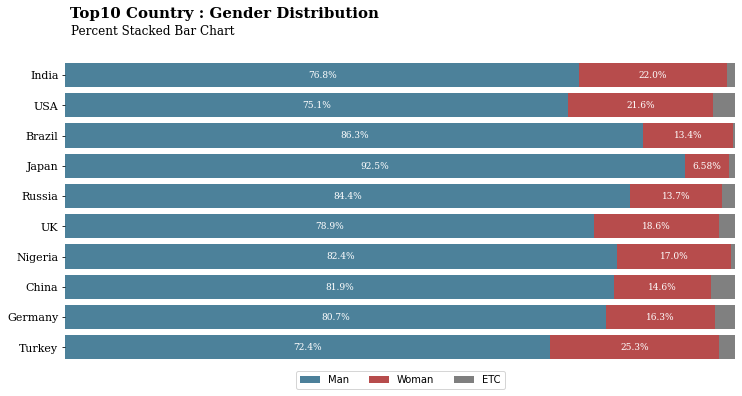

In [15]:
fig, ax = plt.subplots(1,1, figsize=(12,6))

ax.barh(y=data_q2q3_ratio.index, width=data_q2q3_ratio['Man'], color='#004c70', alpha=0.7, label='Man')
ax.barh(y=data_q2q3_ratio.index, width=data_q2q3_ratio['Woman'], left=data_q2q3_ratio['Man'], color='#990000',alpha=0.7,label='Woman')
ax.barh(y=data_q2q3_ratio.index, width=data_q2q3_ratio['ETC'], left=data_q2q3_ratio['Man']+data_q2q3_ratio['Woman'], color='#4a4a4a', alpha=0.7, label='ETC')

ax.set_xlim(0,1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index,fontfamily='serif',fontsize=11)

# 남성 annotation
for i in data_q2q3_ratio.index:
  ax.annotate(f"{data_q2q3_ratio['Man'][i]*100:.3}%",
              xy=(data_q2q3_ratio['Man'][i]/2, i),
              va='center', ha='center',
              fontsize=9, fontweight='light', fontfamily='serif', color='white')
  
# 여성 annotation
for i in data_q2q3_ratio.index:
  ax.annotate(f"{data_q2q3_ratio['Woman'][i]*100:.3}%",
              xy=(data_q2q3_ratio['Man'][i]+data_q2q3_ratio['Woman'][i]/2, i),
              va='center', ha='center',
              fontsize=9, fontweight='light', fontfamily='serif', color='white')    
  
fig.text(0.13, 0.95, 'Top10 Country : Gender Distribution', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.131, 0.91, 'Percent Stacked Bar Chart', fontsize=12, fontfamily='serif')

for s in ['top','left','right','bottom']:
  ax.spines[s].set_visible(False)

ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))
plt.show()

- 응답자가 가장 많았던 top 10 국가의 성비
- 여성의 비율은 굉장히 적음
- 일본의 경우, 여성은 6.58%에 불과

## Q4 & Q6. Degree / Experience
- Q4 = 교육수준 
- Q6 = 경력

In [16]:
print('Q4', data['Q4'].unique())
print('\nQ6', data['Q6'].unique())

Q4 ['Doctoral degree' 'Master’s degree' 'Bachelor’s degree'
 'No formal education past high school'
 'Some college/university study without earning a bachelor’s degree'
 'Professional degree' 'I prefer not to answer' nan]

Q6 ['5-10 years' '10-20 years' '3-5 years' '< 1 years' '1-2 years'
 '20+ years' 'I have never written code' nan]


- Q4

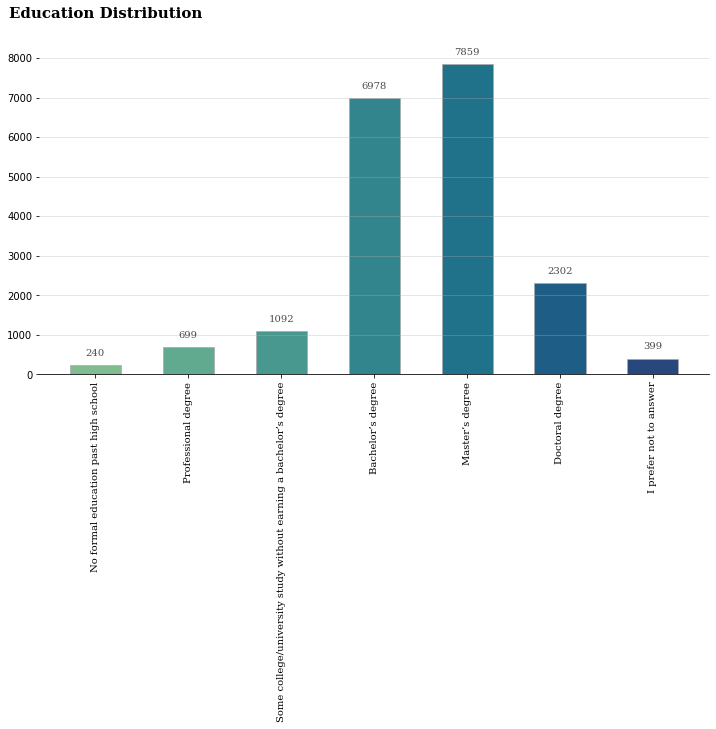

In [17]:
# 학력순으로 정렬
q4_order = ['No formal education past high school','Professional degree',
    'Some college/university study without earning a bachelor’s degree',
    'Bachelor’s degree','Master’s degree','Doctoral degree','I prefer not to answer']
data_q4 =data['Q4'].value_counts()[q4_order]

fig, ax = plt.subplots(1,1, figsize=(12,6))
ax.bar(data_q4.index, data_q4, width=0.55, edgecolor='darkgray', color=sns.color_palette('crest',7), linewidth=0.7)

for i in data_q4.index:
  ax.annotate( f"{data_q4[i]}", xy=(i, data_q4[i] + 300),
              va='center', ha='center',
              fontweight='light', fontfamily='serif', color='#4a4a4a')

for s in ['top','left','right']:
  ax.spines[s].set_visible(False)

ax.set_xticklabels(data_q4.index, fontfamily='serif', rotation=90)
fig.text(0.09, 0.95, 'Education Distribution', fontsize=15, fontweight='bold',fontfamily='serif')
ax.grid(axis='y', linestyle='-', alpha=0.4)
plt.show()

- 학사보다 석사 학위가 더 많음

- Q6

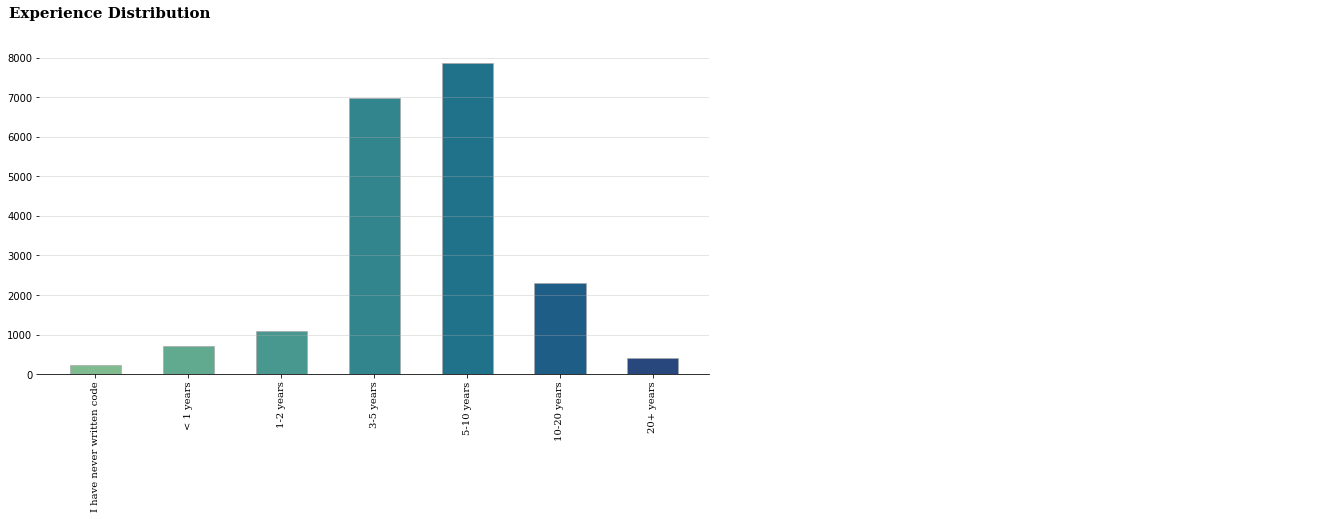

In [18]:
# 경력순으로 정렬
q6_order = ['I have never written code', '< 1 years','1-2 years', '3-5 years', '5-10 years', '10-20 years',  '20+ years']
data_q6 = data['Q6'].value_counts()[q6_order]

fig, ax = plt.subplots(1,1, figsize=(12,6))
ax.bar(data_q4.index, data_q4, width=0.55, edgecolor='darkgray', color=sns.color_palette('crest',7), linewidth=0.7)

for i in data_q6.index:
  ax.annotate( f"{data_q6[i]}", xy=(i, data_q6[i] + 300),
              va='center', ha='center',
              fontweight='light', fontfamily='serif', color='#4a4a4a')

for s in ['top','left','right']:
  ax.spines[s].set_visible(False)

ax.set_xticklabels(data_q6.index, fontfamily='serif', rotation=90)
fig.text(0.09, 0.95, 'Experience Distribution', fontsize=15, fontweight='bold',fontfamily='serif')
ax.grid(axis='y', linestyle='-', alpha=0.4)
plt.show()

- 약 75% 5년 이하의 경력 보유

- Q4 & Q6

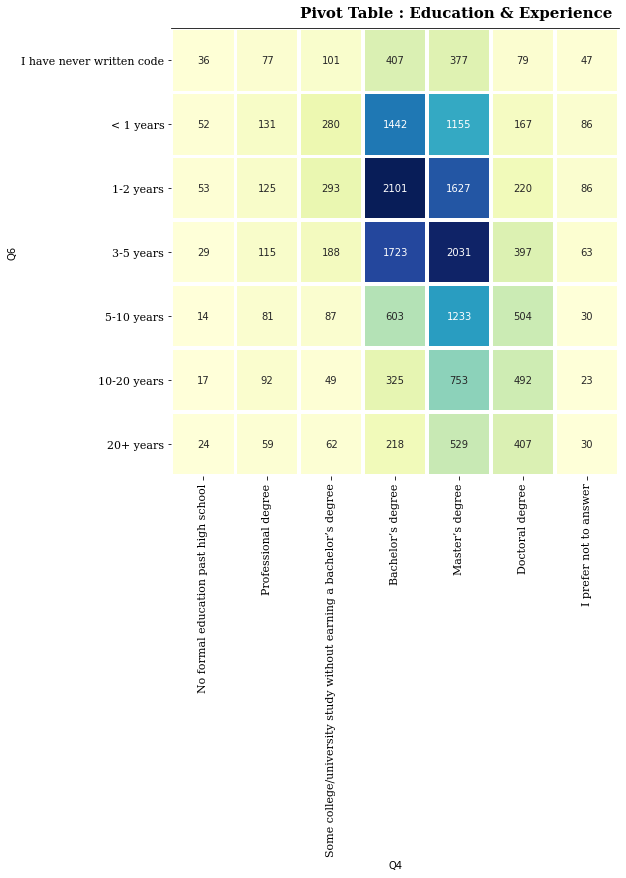

In [19]:
data['count'] = 1
fig, ax = plt.subplots(1,1, figsize=(12,12))
sns.heatmap(pd.pivot_table(data, values='count', index=['Q6'], columns=['Q4'], aggfunc=np.sum).loc[q6_order,q4_order],
            cmap='YlGnBu', square=True, linewidth=2.5, cbar=False, ax=ax, annot=True, fmt='d')
ax.spines['top'].set_visible(True)

fig.text(0.48, 1, 'Pivot Table : Education & Experience', fontweight='bold', fontfamily='serif', fontsize=15)

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation=0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

plt.tight_layout()
plt.show()

- 학사 + 1-2년 경력과 박사 + 3-5년 경력이 가장 많음

## Q14. Visualization Library
- Q14: 시각화를 할 때 어떤 라이브러리를 사용하는지
- Q14_Part_1 ~ Q14_Part_11, Q14_OTHER 총 12개 존재

In [58]:
# Visualization 별 집계
data_q14 = data[[x for x in data.columns if 'Q14' in x]]
data_q14_count = pd.Series(dtype='int')

for i in data_q14.columns:
  data_q14_count[data_q14[i].value_counts().index[0]] = data_q14[i].count()

data_q14_count

 Matplotlib                  12342
 Seaborn                      8821
 Plotly / Plotly Express      4130
 Ggplot / ggplot2             4120
 Shiny                        1137
 D3 js                         829
 Altair                        233
 Bokeh                         920
 Geoplotlib                    850
 Leaflet / Folium              596
None                          1897
Other                          565
dtype: int64

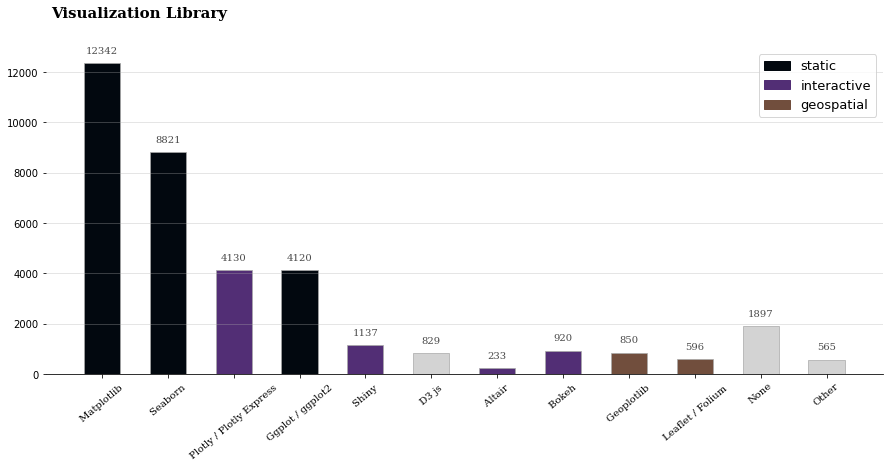

In [67]:
# 시각화 라이브러리 종류(static, interactive, geospatial)별 색깔 분리
colors = ['lightgray'] * 14
colors[0] = colors[1] = colors[3] = '#02080F'
colors[2] = colors[4] = colors[6] = colors[7] = '#522e75'
colors[8] = colors[9] = '#714e3d'

# 시각화
fig, ax = plt.subplots(1,1, figsize=(15,6))
ax.bar(data_q14_count.index, data_q14_count, width=0.55, edgecolor='darkgrey', color=colors, linewidth=0.7)

# annotation
for i in data_q14_count.index:
  ax.annotate(f"{data_q14_count[i]}", xy=(i, data_q14_count[i]+500),
              va='center', ha='center', fontweight='light', fontfamily='serif', color='#4a4a4a')

# grid 선 삭제  
for s in ['top', 'left', 'right']:
  ax.spines[s].set_visible(False)

# 그래프에 텍스트 추가
ax.set_xticklabels(data_q14_count.index, fontfamily='serif', rotation=40)
fig.text(0.13, 0.95, 'Visualization Library', fontsize=15, fontweight='bold', fontfamily='serif')
ax.grid(axis='y', linestyle='-', alpha=0.4)

# legend를 수동으로 조절
static = mpatches.Patch(color='#02080F', label='static')
interactive = mpatches.Patch(color='#522e75', label='interactive')
geo = mpatches.Patch(color='#714e3d', label='geospatial')
plt.legend(handles=[static, interactive, geo], fontsize=13)

plt.show()

- 시각화 라이브러리 중 가장 많이 사용되는 것은 Matplotlib
- interactive visualization으로는 Plotly가 가장 많이 사용
- geovisualization 라이브러리는 많이 사용되지 않음


## Q2 & Q5 & Q15. Gender / Position / ML Experience

In [68]:
data['Q5'].unique()

array(['Student', 'Data Engineer', 'Software Engineer', 'Data Scientist',
       'Data Analyst', 'Research Scientist', 'Other',
       'Currently not employed', 'Statistician',
       'Product/Project Manager', 'Machine Learning Engineer', nan,
       'Business Analyst', 'DBA/Database Engineer'], dtype=object)

In [69]:
data['Q15'].unique()

array(['1-2 years', 'I do not use machine learning methods', '3-4 years',
       nan, 'Under 1 year', '2-3 years', '4-5 years', '5-10 years',
       '20 or more years', '10-20 years'], dtype=object)

In [70]:
q5_order = ['Business Analyst','Data Analyst','Data Engineer','Data Scientist','DBA/Database Engineer',
            'Machine Learning Engineer','Product/Project Manager','Research Scientist','Software Engineer',
            'Statistician','Student','Currently not employed','Other']
q15_order = ['I do not use machine learning methods','Under 1 year','1-2 years',
             '2-3 years','3-4 years','4-5 years','5-10 years','10-20 years','20 or more years']  

In [72]:
data_q5q15 = pd.pivot_table(data, values='count', index=['Q5'], columns=['Q15'], aggfunc=np.sum).fillna(0).astype(int).loc[q5_order, q15_order].stack()
data_q5q15_man = pd.pivot_table(data[data['Q2']=='Man'], values='count', index=['Q5'], columns=['Q15'], aggfunc=np.sum).fillna(0).astype(int).loc[q5_order, q15_order].stack()
data_q5q15_woman = pd.pivot_table(data[data['Q2']=='Woman'], values='count', index=['Q5'], columns=['Q15'], aggfunc=np.sum).fillna(0).astype(int).loc[q5_order, q15_order].stack()